# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



# Dataset Summary
>> The Heart Disease dataset originates from the Cleveland Clinic Foundation and partner institutions. It was collected through medical examinations and contains patient records with demographic, clinical, and laboratory data. The cleaned version of the dataset has 14 attributes, including age, sex, chest pain type, blood pressure, cholesterol, fasting blood sugar, ECG results, maximum heart rate, exercise-induced angina, ST depression, slope, number of major vessels, and thalassemia type. The target attribute num indicates the presence of heart disease.
This dataset is interesting because it has been widely used in medical machine learning research to study risk factors of heart disease. It’s valuable both for predictive modeling (diagnosis) and for understanding which features (like cholesterol, blood pressure, or exercise stress results) most influence outcomes. This dataset is very intriguing to me due to my own heart conditions/ disability.

In [1]:
import pandas as pd

df = pd.read_csv("heart_disease_cleaned.csv")

df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    bool   
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    bool   
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.4+ KB


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,919.000000,919.000000,919,919,919,919.000000,919.000000,919,919,919.000000,919,919.000000,919,919.000000,919,919.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,reversable defect,NaN
freq,NaN,NaN,725,304,496,NaN,NaN,781,551,NaN,533,NaN,527,NaN,504,NaN
mean,460.180631,53.509249,NaN,NaN,NaN,132.704853,200.791393,NaN,NaN,136.815734,NaN,0.973408,NaN,0.501632,NaN,0.993471
std,265.693391,9.429689,NaN,NaN,NaN,18.070335,109.213597,NaN,NaN,25.371260,NaN,1.120490,NaN,0.786423,NaN,1.141398
min,1.000000,28.000000,NaN,NaN,NaN,80.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.500000,47.000000,NaN,NaN,NaN,120.000000,178.500000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.000000,54.000000,NaN,NaN,NaN,130.000000,224.000000,NaN,NaN,138.000000,NaN,0.800000,NaN,0.000000,NaN,1.000000
75%,689.500000,60.000000,NaN,NaN,NaN,141.210000,268.000000,NaN,NaN,156.000000,NaN,1.900000,NaN,1.000000,NaN,2.000000


# 5 Questions
>> 1. What is the average age of patients with and without heart disease?
2. Are men or women more likely to be diagnosed with heart disease?
3. Does higher cholesterol correlate with higher heart disease rates?
4. How does maximum heart rate achieved (thalch) differ between patients with and without heart disease?
5. Which chest pain type is most associated with heart disease?

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#styling
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
df["disease"] = (df["num"] > 0).astype(int)

### 1. Average age by disease status

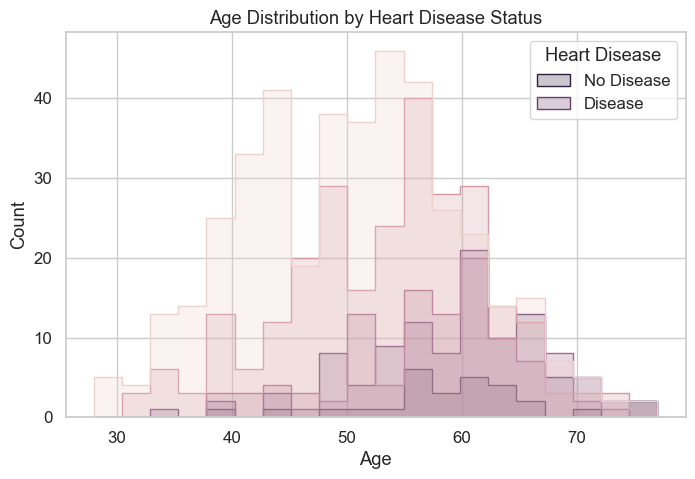

In [18]:
df.groupby("disease")["age"].mean()

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", hue="num", bins=20, kde=False, element="step")
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No Disease", "Disease"])
plt.show()

On average, patients with heart disease are older than those without. This confirms age is a significant risk factor.

### 2. Heart disease prevalence by sex

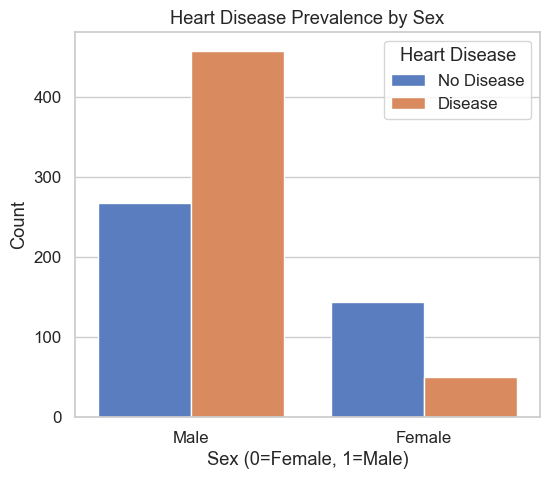

In [19]:
df.groupby("sex")["disease"].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(6,5))
sns.countplot(data=df, x="sex", hue="disease")
plt.title("Heart Disease Prevalence by Sex")
plt.xlabel("Sex (0=Female, 1=Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No Disease", "Disease"])
plt.show()

Men show a higher prevalence of heart disease compared to women in this dataset.

### 3. Cholesterol vs heart disease 

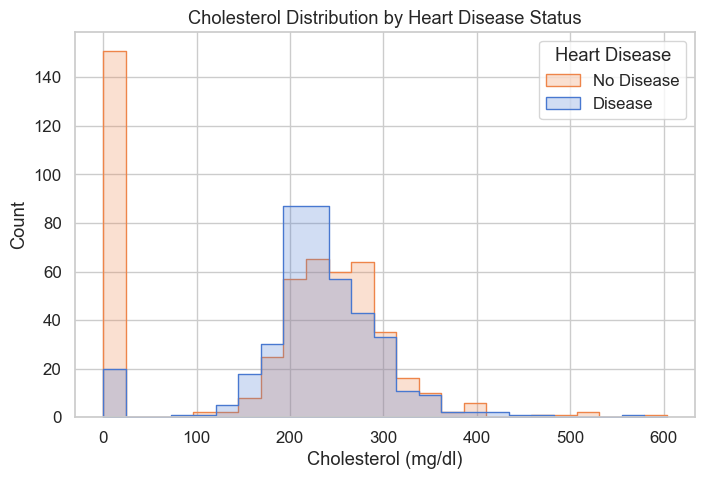

In [20]:
df.groupby("disease")["chol"].describe()

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="chol", hue="disease", bins=25, kde=False, element="step")
plt.title("Cholesterol Distribution by Heart Disease Status")
plt.xlabel("Cholesterol (mg/dl)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No Disease", "Disease"])
plt.show()

Patients with heart disease tend to have slightly higher cholesterol levels, but the overlap is large — showing cholesterol alone is not a perfect predictor.

### 4. Maximum heart rate (thalch)

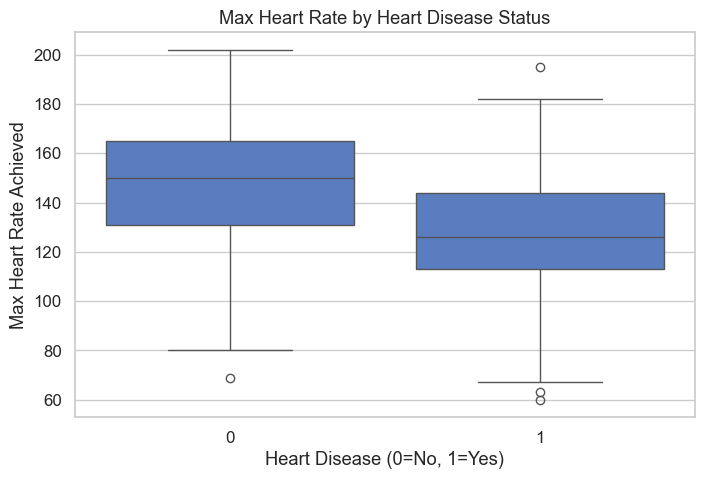

In [21]:
df.groupby("disease")["thalch"].mean()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="disease", y="thalch")
plt.title("Max Heart Rate by Heart Disease Status")
plt.xlabel("Heart Disease (0=No, 1=Yes)")
plt.ylabel("Max Heart Rate Achieved")
plt.show()

Patients without heart disease have higher average maximum heart rates compared to those with heart disease. Reduced heart rate response is a common marker of cardiovascular issues.

### 5. Chest pain type distribution

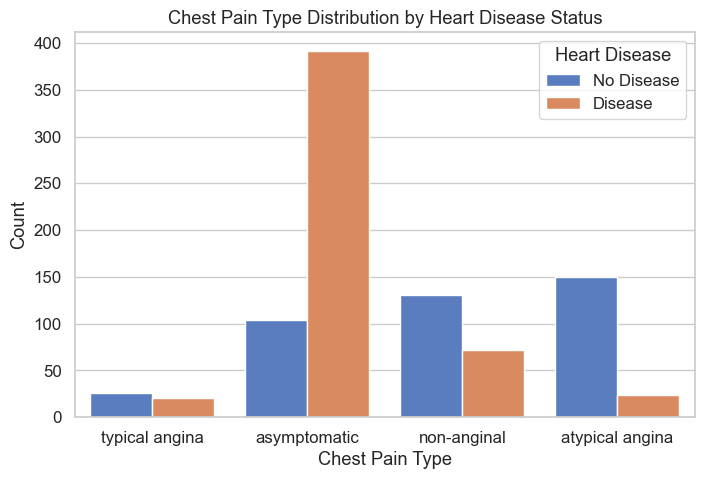

In [22]:
df.groupby("disease")["cp"].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="cp", hue="disease")
plt.title("Chest Pain Type Distribution by Heart Disease Status")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No Disease", "Disease"])
plt.show()

The “asymptomatic” chest pain type is strongly associated with patients who have heart disease, while “typical angina” is more frequent among healthy individuals.